<a href="https://colab.research.google.com/github/m2203287/ml_labs_25/blob/main/lab1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [ ]:
# Загрузка данных
california = fetch_california_housing()

# Создание DataFrame
data = pd.DataFrame(california.data, columns=california.feature_names)
data['Price'] = california.target

In [ ]:
# Проверка данных
print(data.info())
print(data.describe().round(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
count  20640.00  20640.00  20640.00   20640.00    20640.00  20640.00   
mean       3.87     28.64      5.43       1.10     1425.48      3.07   
std        1.90     12.59      2.47       0.47     1132.46     10.39   
min        0.50      1.00      0.85       0.33        3.00      0.69   
25%        2.56     18.00      4.44 

In [ ]:
# Разделение данных на признаки и целевую переменную
y = data['Price']
X = data.drop('Price', axis=1)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Коэффициенты линейной регрессии:
MedInc: 0.4487
HouseAge: 0.0097
AveRooms: -0.1233
AveBedrms: 0.7831
Population: -0.0000
AveOccup: -0.0035
Latitude: -0.4198
Longitude: -0.4337
Свободный член: -37.0233
R² линейной регрессии: 0.5758


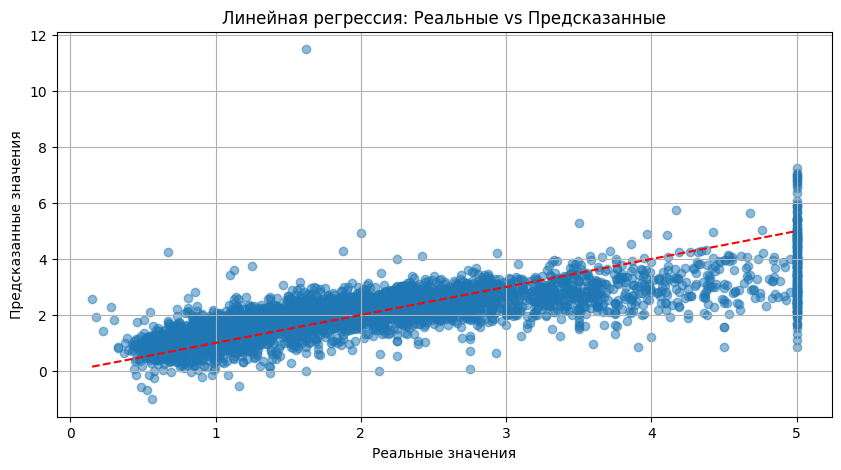

In [ ]:
# Линейная регрессия
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Коэффициенты модели
print("Коэффициенты линейной регрессии:")
for feature, coef in zip(X.columns, linear_model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Свободный член: {linear_model.intercept_:.4f}")

# Предсказания и оценка качества
y_pred_linear = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"R² линейной регрессии: {r2_linear:.4f}")

# Визуализация
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Линейная регрессия: Реальные vs Предсказанные')
plt.grid(True)
plt.show()


R² полиномиальной регрессии (степень 2): 0.6457


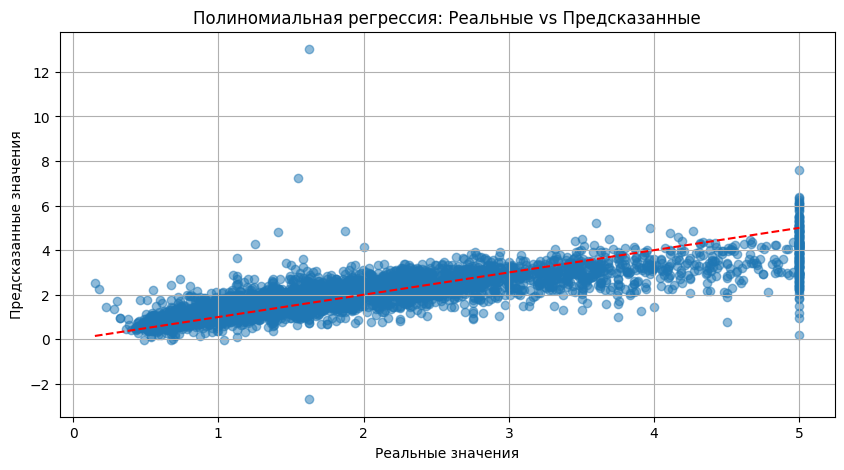

In [ ]:
# Полиномиальная регрессия (степень 2)
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Предсказания и оценка качества
y_pred_poly = poly_model.predict(X_poly_test)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"R² полиномиальной регрессии (степень 2): {r2_poly:.4f}")

# Визуализация
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Полиномиальная регрессия: Реальные vs Предсказанные')
plt.grid(True)
plt.show()


In [ ]:
# Сравнение моделей
print("\nСравнение моделей:")
print(f"Линейная регрессия: R² = {r2_linear:.4f}")
print(f"Полиномиальная регрессия (степень 2): R² = {r2_poly:.4f}")


Сравнение моделей:
Линейная регрессия: R² = 0.5758
Полиномиальная регрессия (степень 2): R² = 0.6457
